# Decision Tree

In [1]:
# 1a
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data= {
    'Likes English':[0,1,1,0,0],
    'Likes AI':[0,1,0,1,0],
    'Raise Salary':[0,0,1,1,0]
}
data= pd.DataFrame(data, columns= data.keys())

In [3]:
data
print(data['Likes AI'].value_counts())

Likes AI
0    3
1    2
Name: count, dtype: int64


In [4]:
## cau 2
def gini_impurity(column):
    value_count= column.value_counts()
    n= value_count.sum()
    p_sum= 0
    for key in value_count.keys():
        p_sum = p_sum + (value_count[key]/n)* (value_count[key]/n)
    gini= 1- p_sum
    return gini


In [5]:
gini_impurity(data['Raise Salary'])
#2c

0.48

In [6]:
# Cau 3
class_name='Raise Salary'
def gini_for_each_condition(data,column):
    value_count= data[column].value_counts()
    gini= 0
    for key in value_count.keys():
        df_k= data[class_name][data[column]== key]
        n_k= value_count[key]
        n= data.shape[0]
        gini= gini + ((n_k/n) * gini_impurity(df_k))
    return gini

gini_for_each_condition(data,'Likes English')
#3d

0.4666666666666667

In [7]:
data= {'Age':[23,25,27,29,29],
       "Likes English": [0,1,1,0,0],
       'Likes AI':[0,1,0,1,0],
       'Raise Salary':[0,0,1,1,0]}
data= pd.DataFrame(data, columns= list(data.keys()))

In [8]:
data

,Age,Likes English,Likes AI,Raise Salary
0,23,0,0,0
1,25,1,1,0
2,27,1,0,1
3,29,0,1,1
4,29,0,0,0


In [9]:
def gini_real_number(column, num):
    temp= data.copy()
    temp[column]= temp[column] <= num
    ans= gini_for_each_condition(temp,column)
    return ans

gini_real_number('Age', 26)
# 4c

0.26666666666666666

In [10]:
import math
def entropy(column):
    value_count= column.value_counts()
    entropy= 0
    n= value_count.sum()
    for key in value_count.keys():
        k= value_count[key]
        entropy= entropy+ ((k/n) * math.log2(n/k))
    return entropy

entropy(data['Raise Salary'])
#5b

0.9709505944546687

In [11]:
def imformation_gain(column):
    value_count= column.value_counts()
    entroypy_child=0
    n= data.shape[0]
    for key in value_count.keys():
        temp= data['Raise Salary'][column== key]
        k= value_count[key]
        entroypy_child= entroypy_child + ((k/n) * entropy(temp))
    return entropy(column)- entroypy_child
imformation_gain(data['Likes English'])

0.019973094021975113

In [13]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [44]:
iris_X, iris_y= datasets.load_iris(return_X_y= True)
X_train, X_test, y_train, y_test =train_test_split(iris_X
                                                  ,iris_y,
                                                  test_size= 0.2,
                                                  random_state= 42)
dt_classifier= DecisionTreeClassifier(criterion='entropy',max_depth=4)
dt_classifier.fit(X_train, y_train)
y_pred= dt_classifier.predict(X_test)
accuracy_score(y_test, y_pred)
#7a 8a

1.0

[Text(0.3181818181818182, 0.9, 'Petal_Width <= 0.8\nentropy = 1.585\nsamples = 120\nvalue = [40, 41, 39]'),
 Text(0.22727272727272727, 0.7, 'entropy = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(0.2727272727272727, 0.8, 'True  '),
 Text(0.4090909090909091, 0.7, 'Petal_Length <= 4.75\nentropy = 1.0\nsamples = 80\nvalue = [0, 41, 39]'),
 Text(0.36363636363636365, 0.8, '  False'),
 Text(0.18181818181818182, 0.5, 'Petal_Width <= 1.65\nentropy = 0.179\nsamples = 37\nvalue = [0, 36, 1]'),
 Text(0.09090909090909091, 0.3, 'entropy = 0.0\nsamples = 36\nvalue = [0, 36, 0]'),
 Text(0.2727272727272727, 0.3, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.6363636363636364, 0.5, 'Petal_Width <= 1.75\nentropy = 0.519\nsamples = 43\nvalue = [0, 5, 38]'),
 Text(0.45454545454545453, 0.3, 'Petal_Length <= 4.95\nentropy = 1.0\nsamples = 8\nvalue = [0, 4, 4]'),
 Text(0.36363636363636365, 0.1, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(0.5454545454545454, 0.1, 'entropy = 0.918\nsam

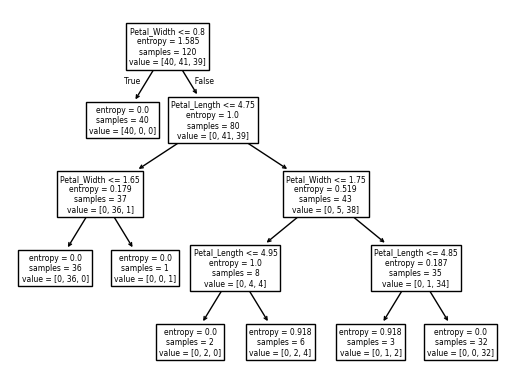

In [45]:
from sklearn.tree import plot_tree
plot_tree(dt_classifier, feature_names=["Sepal_Length", "Sepal_Width", "Petal_Length", "Petal_Width"])

In [20]:
data= {'Age':[23,25,27,29,29],
       'Likes English':[0,1,1,0,0],
       'Likes AI':[0,1,0,1,0],
       'Salary':[200,400,300,500,400]}
data= pd.DataFrame(data, columns= data.keys())

In [21]:
data

,Age,Likes English,Likes AI,Salary
0,23,0,0,200
1,25,1,1,400
2,27,1,0,300
3,29,0,1,500
4,29,0,0,400


In [28]:
temp= data['Salary'][data['Likes AI']==1]
print(temp.size)

2


In [33]:
def SSE(data,column):
    value_count= data[column].value_counts()
    SSE=0
    for key in value_count.keys():
        temp= data['Salary'][data[column]== key]
        mean= temp.mean()
        n= temp.size
        k=0
        for val in temp:
           k+= (val-mean)**2
        k/= n
        SSE+= k
    return SSE 

In [34]:
SSE(data,'Likes AI')
#9a

9166.666666666668

In [35]:
def SSE_for_number(column,num):
    temp= data.copy()
    temp[column]= temp[column] <= num
    return SSE(temp, column)

In [36]:
SSE_for_number('Age', 24)
# 10c

5000.0